**Data Science Challenge: Card Transactions!**



# Introduction

## Background and motivation:
Credit card fraud has become a serious problem for the financial industry and society as a whole. Fraudulent transactions can result in significant financial losses for banks, merchants, and consumers, as well as damage to the trust and confidence in the financial system. Traditional rule-based systems have been used to detect fraud, but these methods are often limited in their ability to identify new and evolving types of fraud. Therefore, there is a need for more advanced machine learning techniques to detect fraud in credit card transactions.

## Objectives and scope:


The objective of this study is to develop a credit card fraud detection classification model that can accurately identify fraudulent transactions. To achieve this objective, we will use credit card transactions data, which is a dataset that loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. We will consider various classification algorithms, such as logistic regression, decision trees, random forests, and neural networks, to identify the most accurate and efficient model.



## Significance and contribution:

The significance of this study lies in its potential to reduce credit card fraud and its economic and social impact. By developing an accurate and efficient credit card fraud detection model, banks and merchants can detect fraudulent transactions in real-time, reducing the financial losses and restoring trust in the financial system. This study will also contribute to the current state of credit card fraud detection, by identifying the most effective machine learning techniques and potential implications for future research and development.


In the following sections, we will describe the data sources and preprocessing techniques used, the classification algorithms considered, the model evaluation metrics, and techniques to improve the model's performance. By the end of this study, we hope to deliver a comprehensive credit card fraud detection classification model that can be used to identify fraudulent transactions in real-time.
    


# Data preprocessing

## Data collection:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve, average_precision_score, make_scorer
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score



/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#To run the code, you can change this path to the desired one
df_complete=pd.read_json(r"/Users/alinikkhah/Final_Ml_Projects/transactions.txt",lines=True)

In [3]:
# Sample xp percent
#xp=0.05;
#fraud_indices = df_complete[df_complete['isFraud'] == 1].index
#non_fraud_indices = df_complete[df_complete['isFraud'] == 0].index

# Sample 1%0 of fraud and non-fraud indices separately
#fraud_sample = np.random.choice(fraud_indices, size=int(xp*len(fraud_indices)), replace=False)
#non_fraud_sample = np.random.choice(non_fraud_indices, size=int(xp*len(non_fraud_indices)), replace=False)

# Combine the samples and sort by index
#sample_indices = np.concatenate([fraud_sample, non_fraud_sample])
#sample_indices.sort()

# Get the final sampled dataset
#df = df_complete.loc[sample_indices]


In [4]:
df=df_complete.copy()

### Data Description 

In [5]:
pd.set_option('display.max_columns', None)

df.head()


#pd.reset_option('^display.', silent=True)


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [6]:
#Substitute empty values with Nan
df=df.replace('',np.NaN)

In [7]:
# Exploratory Data Analysis


def top_rows(df,value):
    print('\033[1m'+ 'displaying the', value, 'rows from top'+'\033[0m')
    a=df.head(value)
    print(a,'\n')
    
def bottom_rows(df,value):
    print('\033[1m'+'displaying the', value, 'rows from bottom'+'\033[0m')
    b=df.tail(value)
    print(b,'\n')
    
def rows_columns(df):
    print('\033[1m'+'Shape of the Dataset'+'\033[0m')
    #c=df.shape
    #print(c,'\n')
    print("Number of datapoints:", len(df),"\nNumer of features:",len(df.columns),'\n')
    
def col_names(df):
    print('\033[1m'+'Column Names in the Dataset'+'\033[0m')
    d=df.columns
    print(d,'\n')
    
def information(df):
    print('\033[1m'+'Quick Overview of DataSet(info)'+'\033[0m')
    e = df.info()
    print(e,'\n')

def sizee(df):
    print('\033[1m'+'No.of Elements in the DataSet'+'\033[0m')
    f = df.size
    print(f,'\n')

def ndimension(df):
    print('\033[1m'+'No.of Dimensions in the DataSet'+'\033[0m')
    g = df.ndim
    print(g,'\n')
    
def stats_summary(df):
    print('\033[1m'+'Staistical Summary of DataSet'+'\033[0m')
    h = df.describe()
    print(h,'\n')
    
def null_values(df):
    print('\033[1m'+'Percentage of Missing values in each column'+'\033[0m')
    i=round(df.isnull().sum()*100/len(df),2)
    print(i,'\n')
    
def n_unique(df):
    print('\033[1m'+'Number of unique elements'+'\033[0m')
    j = df.nunique()
    print(j,'\n')
    
def memory_use(df):
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')
    k = df.memory_usage()
    print(k,'\n')
    
def is_na(df,value):
    print('\033[1m'+'Dataframe filled with boolean values with true indicating missing values'+'\033[0m')
    l = df.isna().head(value)
    print(l,'\n')
    
def duplicate(df):
    print('\033[1m'+'Number of duplicate rows in the DataSet'+'\033[0m')
    m = df.duplicated().sum()
    print(m,'\n')
    
def valuecounts(df):
    print('\033[1m'+'Series containing count of unique values'+'\033[0m')
    n = df.value_counts()
    print(n,'\n')

def datatypes(df):
    print('\033[1m'+'Datatype of each column'+'\033[0m')
    o = df.dtypes
    print(o,'\n')
    
def correlation(df):
    print('\033[1m'+'Correalation between all columns in DataFrame'+'\033[0m')
    p = df.corr()
    print(p,'\n')
    
def nonnull_count(df):
    print('\033[1m'+'Count of non-null values'+'\033[0m')
    q = df.count()
    print(q,'\n')
    
def eda(df):
    value= 5 
    sizee(df)
    ndimension(df)
    #top_rows(df,value)
    #bottom_rows(df,value)
    rows_columns(df)
    col_names(df)
    datatypes(df)
    #information(df)
    stats_summary(df)
    null_values(df)
    n_unique(df)
    #memory_use(df)
    #is_na(df,value)
    #nonnull_count(df)
    duplicate(df)
    #valuecounts(df)
    #correlation(df)
    
    
eda(df)

No.of Elements in the DataSet
22804527 

No.of Dimensions in the DataSet
2 

Shape of the Dataset
Number of datapoints: 786363 
Numer of features: 29 

Column Names in the Dataset
Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object') 

Datatype of each column
accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmoun

In [8]:
def stats_u(data,col):
    if data[col].dtype == "float64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        max_value = data[col].max()
        print('Maximum value of',col,'column',max_value)
        min_value = data[col].min()
        print('Minimum value of',col,'column',min_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
            
    elif data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print("Outliers are:")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
    else:
        print(col,'has Qualitative Data')
        z = df[col].mode()
        print('mode of',col,'column:\n',z)
        print('Count of mode is:\n',df[col].value_counts())
        print('Unique strings in',col,'are',data[col].nunique())
        if(data[col].nunique() == 1):
            print(col,'has same string')
        elif(data[col].nunique() == 2):
            print(col,'has binary strings')
        else:
            print(col,'has multi stings')



print('\033[1m'+'Summary Of Each Colomn'+'\033[0m')
print("\n")
cols=df.columns
cols
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(df,i)
    print("\n")

Summary Of Each Colomn


accountNumber
accountNumber has Quantitative data
mean of accountNumber column 537232599.4617028
median of accountNumber column 507456073.0
standard deviation of accountNumber column 255421092.3073582
quartile 1 of accountNumber column is 330133277
quartile 2 of accountNumber column is 507456073
quartile 3 of accountNumber column is 767620004
quartile 4 of accountNumber column is 999389635
Lower Limit Point: -326096813.5
Upper Limit Point: 1423850094.5
No outliers


customerId
customerId has Quantitative data
mean of customerId column 537232599.4617028
median of customerId column 507456073.0
standard deviation of customerId column 255421092.3073582
quartile 1 of customerId column is 330133277
quartile 2 of customerId column is 507456073
quartile 3 of customerId column is 767620004
quartile 4 of customerId column is 999389635
Lower Limit Point: -326096813.5
Upper Limit Point: 1423850094.5
No outliers


creditLimit
creditLimit has Quantitative data
mean of credit

### Missing Values


Now we can see the percentage of Null values in each columns

In [9]:
round(df.isnull().sum()*100/len(df),2)


accountNumber                 0.00
customerId                    0.00
creditLimit                   0.00
availableMoney                0.00
transactionDateTime           0.00
transactionAmount             0.00
merchantName                  0.00
acqCountry                    0.58
merchantCountryCode           0.09
posEntryMode                  0.52
posConditionCode              0.05
merchantCategoryCode          0.00
currentExpDate                0.00
accountOpenDate               0.00
dateOfLastAddressChange       0.00
cardCVV                       0.00
enteredCVV                    0.00
cardLast4Digits               0.00
transactionType               0.09
echoBuffer                  100.00
currentBalance                0.00
merchantCity                100.00
merchantState               100.00
merchantZip                 100.00
cardPresent                   0.00
posOnPremises               100.00
recurringAuthInd            100.00
expirationDateKeyInMatch      0.00
isFraud             


There are 6 columns that all of their values are Null, so I remove these columns.

In [10]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'], axis=1, inplace=True)
df=df.reset_index(drop=True)



Then we caculate percentage of Null values in each column:


In [11]:
round(df.isnull().sum()*100/len(df),2)

accountNumber               0.00
customerId                  0.00
creditLimit                 0.00
availableMoney              0.00
transactionDateTime         0.00
transactionAmount           0.00
merchantName                0.00
acqCountry                  0.58
merchantCountryCode         0.09
posEntryMode                0.52
posConditionCode            0.05
merchantCategoryCode        0.00
currentExpDate              0.00
accountOpenDate             0.00
dateOfLastAddressChange     0.00
cardCVV                     0.00
enteredCVV                  0.00
cardLast4Digits             0.00
transactionType             0.09
currentBalance              0.00
cardPresent                 0.00
expirationDateKeyInMatch    0.00
isFraud                     0.00
dtype: float64


Since less than 0.6% of rows have null values, we removed those rows from dataset.


In [12]:
df.dropna(inplace=True)

#df3.info()

### Removing Duplicate Transactions



We noticed a number of duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

#### Duplicate Rows

In [13]:
df.duplicated().sum()


0

There is no any duplicate. Here is the code in the case we had one.

In [14]:
df.drop_duplicates(inplace=True)


#### Reversed Transactions

Next step, we want to find reversed transaction.

In [15]:
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)


There are 3 types of transactions: PURCHASE, ADDRESS_VERIFICATION, and REVERSAL. Also, dataset misses transaction type for some transactions (0.09% of total transactions)

In [16]:
df_reversal=df.loc[df.transactionType=='REVERSAL']
df_reversal=df_reversal.reset_index(drop=True)
#df_reversal.head()

In [17]:
df_reversal.shape[0]

20062

In [18]:
total_reverse=df_reversal['transactionAmount'].sum()
total_reverse

2787895.03


There are 20,303 reversed transactions with the total amount of $2,821,792.5


#### Multi-swipe  Transactions

Next we find all multi-swipe transactions. We determine transactions as multiple-swipe if there are two transactions have same customer ID, merchant name, transaction amount, and transaction type. However, these transactions should happen within a short time span. In the next step, we want to understand how to define this time period. 

In [19]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

dft=df.copy()

dft['time_dif'] = (dft.sort_values(['transactionDateTime'])
                       .groupby(['customerId','merchantName', 'transactionAmount','transactionType'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()/60)


We look at the time differences between transactions with the same customer ID, merchant name, transaction amount, and transaction type. In the below plot, we can see most of them happen in less than 10 minutes as we expected. 

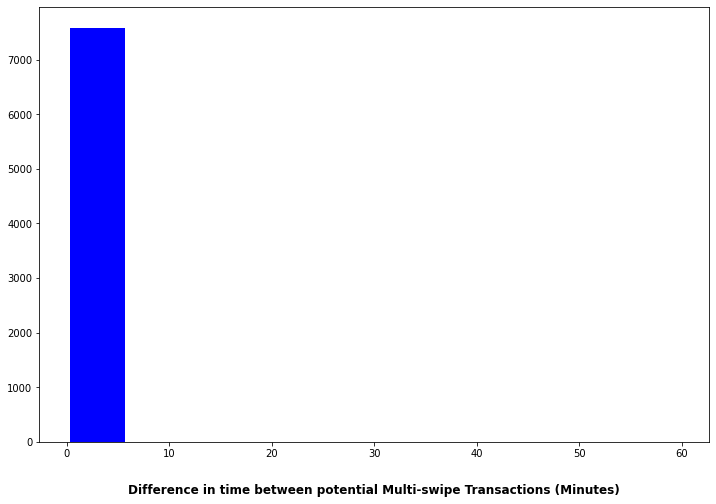

In [20]:
ax = dft.hist(column='time_dif', bins=10,range=[0, 60], grid=False, figsize=(12,8), color='blue',zorder=2,rwidth=0.9)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("Difference in time between potential Multi-swipe Transactions (Minutes)",weight='bold', labelpad=25, size=12)

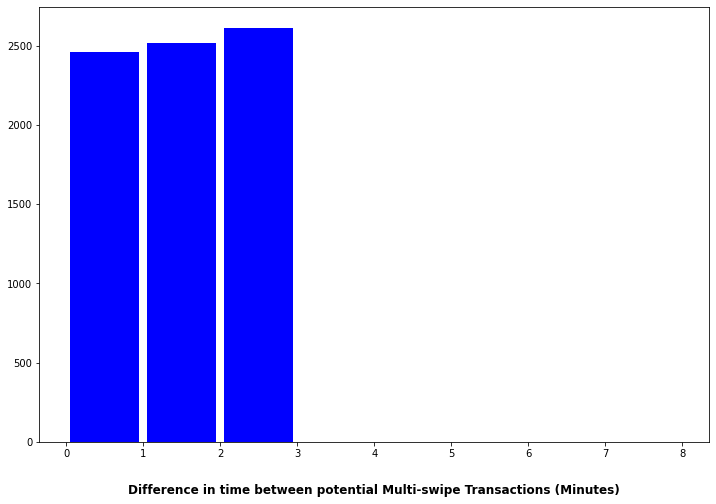

In [21]:
ax = dft.hist(column='time_dif', bins=8,range=[0, 8], grid=False, figsize=(12,8), color='blue',zorder=2,rwidth=0.9)
ax = ax[0]
for x in ax:
    x.set_title("")
    x.set_xlabel("Difference in time between potential Multi-swipe Transactions (Minutes)",weight='bold', labelpad=25, size=12)


We plot again these transactions and see that most of them happen in less than 3 miutes. So two transactions are multiple-swipe when they have same customer ID, merchant name, transaction amount, transaction type, and happen within 3 minutes

In [22]:
dft['MultiSwipe'] = (dft.sort_values(['transactionDateTime'])
                       .groupby(['customerId','merchantName', 'transactionAmount','transactionType'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(180))

df_multi=dft.loc[dft.MultiSwipe==True]
df_multi=df_multi.reset_index(drop=True)
#df_multi.head()

In [23]:
df_multi.shape[0]

7588

In [24]:
total_multi=df_multi['transactionAmount'].sum()
total_multi

1091318.13

There are 7,671 multi-swipe transactions with the total amount of $1,102,920.99

We remove duplicates rows including reversal transactionType and multi-swipe transactions.

In [25]:
df2=df.copy()

df2=df2.loc[df2.transactionType!='REVERSAL']
df2['MultiSwipe'] = (df2.sort_values(['transactionDateTime'])
                       .groupby(['customerId','merchantName', 'transactionAmount','transactionType'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(180))
df2=df2.loc[dft.MultiSwipe==False]
df2=df2.reset_index(drop=True)


#pd.reset_option(“max_columns”)
pd.set_option('display.max_columns', None)


### Outliers

When working with an unbalanced dataset for fraud detection, removing outliers can be a bit more complicated. In many cases, fraudulent transactions are already considered outliers because they are much less frequent than non-fraudulent transactions. Therefore, removing all outliers could potentially remove important information about the minority class (i.e., fraudulent transactions). 

## Visualization

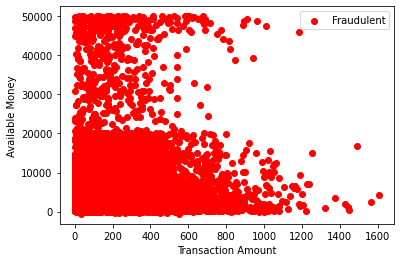

In [26]:
data = df2.copy()

# Separate the data into two groups: fraudulent and non-fraudulent transactions
fraud = data[data["isFraud"] == 1]
not_fraud = data[data["isFraud"] == 0]

# Create a scatter plot with color-coded points
plt.scatter(fraud["transactionAmount"], fraud["availableMoney"], c="red", label="Fraudulent")
#plt.scatter(not_fraud["transactionAmount"], not_fraud["availableMoney"], c="green", label="Not Fraudulent")

# Add labels and a legend
plt.xlabel("Transaction Amount")
plt.ylabel("Available Money")
plt.legend()

# Display the plot
plt.show()


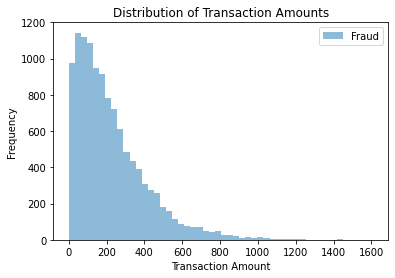

In [27]:
data = df2.copy()

# filter the data by fraud status
fraud = data[data['isFraud'] == 1]
not_fraud = data[data['isFraud'] == 0]

# create the histogram with two overlaid histograms
plt.hist(fraud['transactionAmount'], bins=50, alpha=0.5, label='Fraud')
#plt.hist(not_fraud['transactionAmount'], bins=50, alpha=0.5, label='Not Fraud')
plt.legend(loc='upper right')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()


In [28]:
df2["transactionAmount"].mode().iat[0]

0.0

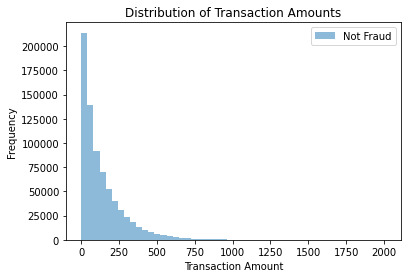

In [29]:
data = df2.copy()

# filter the data by fraud status
fraud = data[data['isFraud'] == 1]
not_fraud = data[data['isFraud'] == 0]

# create the histogram with two overlaid histograms
#plt.hist(fraud['transactionAmount'], bins=50, alpha=0.5, label='Fraud')
plt.hist(not_fraud['transactionAmount'], bins=50, alpha=0.5, label='Not Fraud')
plt.legend(loc='upper right')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

In [30]:
df2["transactionAmount"].mean()

136.8532047961434

In [31]:
df2["transactionAmount"].median()

87.68

The distribution of the transaction amount is heavily right-skewed since the most of transactions are relatively small. The mean value of all transactions is 136.99, the median is 87.9, the mode is 0 and the largest transaction is 2011.54. 

Because of right-skewed, we may need to determine the best-fit distribution from Weibull family, Gamma family, Chi-square family, Lognormal family, or Power lognormal family. We also may need to consider a normalizing transformation such as the Box-Cox transformation.


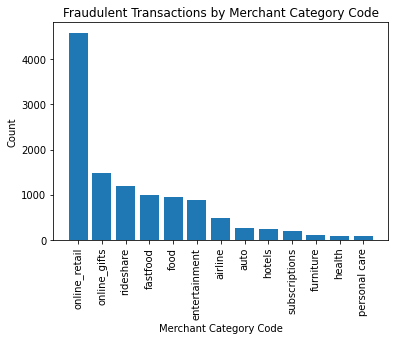

In [32]:
data = df2.copy()

# Create a new dataframe that only contains fraudulent transactions
fraudulent_transactions = data[data['isFraud'] == True]

# Group the fraudulent transactions by merchant category code and count the number of occurrences
fraudulent_transactions_by_mcc = fraudulent_transactions.groupby('merchantCategoryCode').size().reset_index(name='count')

# Sort the dataframe by the 'count' column in descending order
fraudulent_transactions_by_mcc = fraudulent_transactions_by_mcc.sort_values(by='count', ascending=False)

# Create the bar chart
plt.bar(fraudulent_transactions_by_mcc['merchantCategoryCode'], fraudulent_transactions_by_mcc['count'])
plt.title('Fraudulent Transactions by Merchant Category Code')
plt.xlabel('Merchant Category Code')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


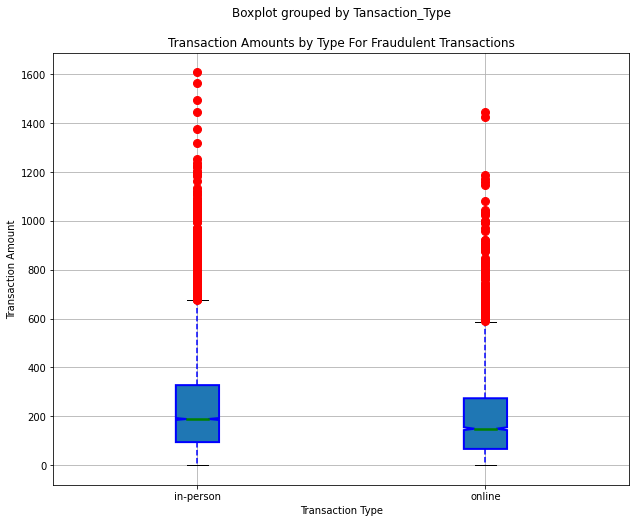

In [33]:
data = df2.copy()

data= data[data['isFraud'] == True]

# Create a new column to indicate whether the transaction is online or in-person
data['Tansaction_Type'] = ['online' if cp else 'in-person' for cp in data['cardPresent']]


# Create a box plot of transaction amounts for each type of transaction, colored by whether they are fraudulent or not
fig, ax = plt.subplots(figsize=(10, 8))

boxprops = dict(linestyle='-', linewidth=2, color='b')
flierprops = dict(marker='o', markersize=8, markerfacecolor='r', markeredgecolor='r')
medianprops = dict(linestyle='-', linewidth=2.5, color='g')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='b')

fraud_color = 'r'
nonfraud_color = 'b'

data.boxplot(column='transactionAmount', by='Tansaction_Type', ax=ax, 
             boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops,
             patch_artist=True, notch=True)

colors = [fraud_color if i == 1 else nonfraud_color for i in data['isFraud']]
for i, box in enumerate(ax.artists):
    box.set_facecolor(colors[i])

# Set the axis labels and title
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Transaction Amount')
ax.set_title('Transaction Amounts by Type For Fraudulent Transactions')

# Show the plot
plt.show()


## Feature selection and engineering

In [34]:
df3=df2.copy()

### Remove Irrelevant Columns

We remove these columns ('accountNumber','customerId','MultiSwipe','cardLast4Digits','currentBalance') because they do not affect our final prediction. 
Note that currentBalance=creditLimit-availableMoney and we already have "credit limit" and "available money" in our dataset, so we do not need "current balance" anymore.

In [35]:
df3.drop(['accountNumber','customerId','MultiSwipe','cardLast4Digits','currentBalance','merchantName'],axis=1,inplace=True)

### Create new features

Transaction Velocity: This feature could be created by calculating the number of transactions made by a customer in a certain time period, such as the last 24 hours. A high transaction velocity could be an indicator of fraudulent activity.

Average Transaction Amount: This feature could be created by calculating the average amount of transactions made by a customer. This could help detect instances of a customer making transactions that are significantly larger than their usual behavior.

Geographic Velocity: This feature could be created by calculating the number of transactions made by a customer in different geographic locations in a certain time period, such as the last 24 hours. A high geographic velocity could be an indicator of fraudulent activity.

Time of Day: This feature could be created by extracting the hour from the transaction datetime. Fraudulent activity may occur at specific times of day, such as during non-business hours.

Transaction Recency: This feature could be created by calculating the time since the last transaction made by a customer. Fraudulent activity may occur more frequently in customers who have not made transactions in a long time.

Transaction Amount Deviation: This feature could be created by calculating the deviation between a customer's current transaction amount and their average transaction amount. A high deviation could be an indicator of fraudulent activity.

Transaction Category: This feature could be created by grouping the merchant category codes into broader categories, such as "Retail", "Travel", "Entertainment", etc. This could help detect instances of a customer making transactions in categories that are unusual for them.

Merchant Frequency: This feature could be created by calculating the number of times a customer has made transactions with a specific merchant. A high merchant frequency could be an indicator of fraudulent activity, especially if the merchant is known to be associated with fraud.

Time Since Account Opened: This feature could be created by calculating the time since the customer's account was opened. Fraudulent activity may occur more frequently in newer accounts.

Available Credit: This feature could be created by calculating the percentage of available credit a customer has at the time of the transaction. A low available credit percentage could be an indicator of fraudulent activity.

Number of Accounts: This feature could be created by calculating the number of accounts a customer has. A customer with a large number of accounts may be more likely to engage in fraudulent activity.

Type of Account: This feature could be created by categorizing the type of account a customer has, such as "Credit", "Debit", or "Prepaid". Certain types of accounts may be more likely to be associated with fraud.

I implemented some of these new features below

We define a new feature as CVV_correct to see if a customer enters right CVV code. We can use this one later for our fraud detection model.Then we remove 'cardCVV' and 'enteredCVV' since we do not need them anymore.

In [36]:
df4=df3.copy()

df4['CVV_correct'] = df4['cardCVV'] == df4['enteredCVV']
df4.drop(['cardCVV','enteredCVV'],axis=1,inplace=True)

We now want to converted these 3 date columns to number as follows:

    - accountOpenDate_days: Number of days since its opening
    - dateOfLastAddressChange_days: Number of days since last address changing
    - currentExpDate_days: Number of days until expiration date


In [37]:
df4['accountOpenDate'] = pd.to_datetime(df4['accountOpenDate'])
df4['dateOfLastAddressChange'] = pd.to_datetime(df4['dateOfLastAddressChange'])
df4['currentExpDate'] = pd.to_datetime(df4['currentExpDate'])

df4['accountOpenDate_days']=pd.Timestamp.now().normalize()-df4['accountOpenDate']
df4['dateOfLastAddressChange_days']=pd.Timestamp.now().normalize()-df4['dateOfLastAddressChange']
df4['currentExpDate_days']=df4['currentExpDate']-pd.Timestamp.now().normalize()

df4['accountOpenDate_days'] = df4['accountOpenDate_days'].astype(int)
df4['accountOpenDate_days']=df4['accountOpenDate_days']/(24*3600*(10**9))
df4['dateOfLastAddressChange_days'] = df4['dateOfLastAddressChange_days'].astype(int)
df4['dateOfLastAddressChange_days']=df4['dateOfLastAddressChange_days']/(24*3600*(10**9))
df4['currentExpDate_days'] = df4['currentExpDate_days'].astype(int)
df4['currentExpDate_days']=df4['currentExpDate_days']/(24*3600*(10**9))

df4.drop(['accountOpenDate','dateOfLastAddressChange','currentExpDate'],axis=1,inplace=True)


Regarding 'transactionDateTime' column, we extracted 'day', 'month' and 'hour' to address the effect of transaction time on fraud.


In [38]:
df4['tran_day'] = df4['transactionDateTime'].dt.day
df4['tran_hour'] = df4['transactionDateTime'].dt.hour
df4['tran_month'] = df4['transactionDateTime'].dt.month
df4.drop(['transactionDateTime'],axis=1,inplace=True)

#df4.head()

In [39]:
df4[['CVV_correct','accountOpenDate_days','dateOfLastAddressChange_days','currentExpDate_days','tran_day','tran_hour','tran_month','isFraud']].head()

,CVV_correct,accountOpenDate_days,dateOfLastAddressChange_days,currentExpDate_days,tran_day,tran_hour,tran_month,isFraud
0,True,2900.0,2900.0,101.0,13,14,8,False
1,True,2900.0,2900.0,346.0,11,5,10,False
2,True,2900.0,2900.0,893.0,8,9,11,False
3,True,2900.0,2900.0,893.0,10,2,12,False
4,True,2755.0,2755.0,2415.0,24,21,3,False


### Boolean Features

We converted bool columns ('cardPresent','expirationDateKeyInMatch','isFraud','CVV_correct') to 0 and 1 (False=0 and True=1)

In [40]:
df5=df4.copy()

In [41]:
# Find boolean columns
bool_cols = df5.select_dtypes(include='bool').columns.tolist()

print("Boolean features in the dataset:", bool_cols)

# Convert boolean columns to integers
df5[bool_cols] = df5[bool_cols].astype(int)

df5[bool_cols].head()

Boolean features in the dataset: ['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'CVV_correct']


,cardPresent,expirationDateKeyInMatch,isFraud,CVV_correct
0,0,0,0,1
1,1,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1


### Drop The Label

In [42]:
training = df5.drop("isFraud", axis=1) # drop labels for training set
training_labels = df5["isFraud"].copy()

### Categorical Features

In [43]:
df6=training.copy()

In [44]:
#Get list of categorical variables
s = (df6.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical features in the dataset:", object_cols)

df6[object_cols].head()

Categorical features in the dataset: ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']


,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType
0,US,US,02,01,rideshare,PURCHASE
1,US,US,09,01,entertainment,PURCHASE
2,US,US,09,01,mobileapps,PURCHASE
3,US,US,09,01,mobileapps,PURCHASE
4,US,US,02,01,fastfood,PURCHASE


In [45]:
#number of unique values in each categorical column
df6[object_cols].nunique(axis=0)

acqCountry               4
merchantCountryCode      4
posEntryMode             5
posConditionCode         3
merchantCategoryCode    19
transactionType          2
dtype: int64

In [46]:
#print the column name followed by the value counts for each unique category in that column
for col in object_cols:
    print(f"{col}:\n{df6[col].value_counts()}\n")


acqCountry:
US     742228
MEX      2997
CAN      2311
PR       1482
Name: acqCountry, dtype: int64

merchantCountryCode:
US     742230
MEX      2993
CAN      2305
PR       1490
Name: merchantCountryCode, dtype: int64

posEntryMode:
05    301719
09    226279
02    187588
90     18775
80     14657
Name: posEntryMode, dtype: int64

posConditionCode:
01    599165
08    142683
99      7170
Name: posConditionCode, dtype: int64

merchantCategoryCode:
online_retail           192037
fastfood                106443
entertainment            76050
food                     71595
online_gifts             62914
rideshare                48630
hotels                   32331
fuel                     23631
subscriptions            21789
auto                     20555
health                   18136
personal care            17998
mobileapps               14787
airline                  14581
online_subscriptions     10928
furniture                 7080
food_delivery             6000
gym                      

We use One-hot Encoding for categorical variables

In [47]:
#Onehot Encoding
categorical_features = df6.select_dtypes(include=['object'])
numerical_features =  df6.select_dtypes(exclude=['object'])
df6_cat=pd.get_dummies(categorical_features)
df6_cat.head()

,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE
0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
#Combine Numerical and Categorical Features
df7= pd.concat([numerical_features, df6_cat], axis=1)
df7.head()

,creditLimit,availableMoney,transactionAmount,cardPresent,expirationDateKeyInMatch,CVV_correct,accountOpenDate_days,dateOfLastAddressChange_days,currentExpDate_days,tran_day,tran_hour,tran_month,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE
0,5000,5000.0,98.55,0,0,1,2900.0,2900.0,101.0,13,14,8,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,5000,5000.0,74.51,1,0,1,2900.0,2900.0,346.0,11,5,10,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5000,5000.0,7.47,0,0,1,2900.0,2900.0,893.0,8,9,11,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,5000,5000.0,7.47,0,0,1,2900.0,2900.0,893.0,10,2,12,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5000,5000.0,71.18,1,0,1,2755.0,2755.0,2415.0,24,21,3,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Data Splitting

Scaling should be done after splitting the data into training and testing sets. The reason for this is to avoid data leakage, which can occur when information from the test set leaks into the training set. If scaling is done before splitting the data, the scaling parameters (e.g., mean and standard deviation) will be computed on the entire dataset, including the test set. This means that information from the test set will be used to scale the training set, which can lead to over-optimistic results and incorrect model performance evaluation. Therefore, I splited the data into training and testing sets first, and then perform scaling only on the training set. The scaling parameters obtained from the training set can then be used to scale the test set. This ensures that the test set remains unseen during the scaling process, and prevents data leakage.

I applied transformation after scaling. This is because many transformation functions, such as logarithmic or power transformations, assume that the data is normally distributed or at least symmetric, and scaling can help achieve that.

I applied resampling techniques after data splitting because test data should be free of duplicates and synthetic data. So we use resampling methods only on the training set, not on the test set. 

Also, I applied resampling techniques after scaling. The reason is that scaling ensures that each feature is on the same scale, which helps the resampling method to more effectively balance the classes. If we apply resampling before scaling, it may introduce noise in the data, which could negatively impact the performance of the model.

For fraud detection in an imbalanced dataset, it is generally better to use stratified sampling when splitting the data into train and test sets. This ensures that the proportions of the minority class (fraudulent cases) are maintained in both the training and testing datasets. This is important because if the test set does not have a similar distribution of the minority class as the training set, it may lead to inaccurate evaluation of the model's performance, particularly in terms of its ability to detect fraud cases.

In [49]:
df8=df7.copy()


In [50]:
#Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(df8, training_labels, test_size=0.3, random_state=42, stratify=training_labels)


In [51]:
#Find Numerical Variables
num_train =  X_train.select_dtypes(exclude=['object','uint8']) #unit8 for one-hot encoding
print("Numerical features in the dataset:", num_train.columns)

cat_train =  X_train.select_dtypes(include=['uint8'])


num_test =  X_test.select_dtypes(exclude=['object','uint8']) #unit8 for one-hot encoding

cat_test =  X_test.select_dtypes(include=['uint8'])


num_train.head()

Numerical features in the dataset: Index(['creditLimit', 'availableMoney', 'transactionAmount', 'cardPresent',
       'expirationDateKeyInMatch', 'CVV_correct', 'accountOpenDate_days',
       'dateOfLastAddressChange_days', 'currentExpDate_days', 'tran_day',
       'tran_hour', 'tran_month'],
      dtype='object')


,creditLimit,availableMoney,transactionAmount,cardPresent,expirationDateKeyInMatch,CVV_correct,accountOpenDate_days,dateOfLastAddressChange_days,currentExpDate_days,tran_day,tran_hour,tran_month
499528,7500,6986.59,65.43,1,0,1,4985.0,4985.0,-172.0,10,2,2
467470,5000,2588.79,75.68,1,0,1,3130.0,3130.0,1442.0,14,11,2
176020,5000,4728.41,176.66,1,0,1,3556.0,2329.0,3784.0,1,5,11
616465,20000,12149.70,11.71,0,0,1,5470.0,5470.0,-690.0,24,11,4
395333,20000,2634.48,60.23,0,0,1,2647.0,2580.0,162.0,16,20,8


### Scaling

In [52]:
# Scale the training set using StandardScaler
scaler = StandardScaler()

df_normalized_train = pd.DataFrame(data=scaler.fit_transform(num_train), index=num_train.index, columns=num_train.columns)
df_normalized_test = pd.DataFrame(data=scaler.transform(num_test), index=num_test.index, columns=num_test.columns)

df_normalized_train.head()

,creditLimit,availableMoney,transactionAmount,cardPresent,expirationDateKeyInMatch,CVV_correct,accountOpenDate_days,dateOfLastAddressChange_days,currentExpDate_days,tran_day,tran_hour,tran_month
499528,-0.279973,0.081003,-0.484298,1.108051,-0.036694,0.094574,2.434175,3.107731,-1.029825,-0.652591,-1.374716,-1.350928
467470,-0.494997,-0.413483,-0.415037,1.108051,-0.036694,0.094574,-0.252688,0.381581,0.088531,-0.197020,-0.074463,-1.350928
176020,-0.494997,-0.172905,0.267299,1.108051,-0.036694,0.094574,0.364349,-0.795586,1.711324,-1.677628,-0.941298,1.266921
616465,0.795149,0.661540,-0.847291,-0.902485,-0.036694,0.094574,3.136670,3.820498,-1.388752,0.941910,-0.074463,-0.769184
395333,0.795149,-0.408345,-0.519435,-0.902485,-0.036694,0.094574,-0.952286,-0.426711,-0.798393,0.030766,1.225790,0.394304


### Transformation

In [53]:
# Apply transformation techniques (log or boxcox or sqrt) to the training set

In [54]:
#Combine Numerical and Categorical Features
X_train= pd.concat([df_normalized_train, cat_train], axis=1)
X_test= pd.concat([df_normalized_test, cat_test], axis=1)

X_train.head()

,creditLimit,availableMoney,transactionAmount,cardPresent,expirationDateKeyInMatch,CVV_correct,accountOpenDate_days,dateOfLastAddressChange_days,currentExpDate_days,tran_day,tran_hour,tran_month,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE
499528,-0.279973,0.081003,-0.484298,1.108051,-0.036694,0.094574,2.434175,3.107731,-1.029825,-0.652591,-1.374716,-1.350928,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
467470,-0.494997,-0.413483,-0.415037,1.108051,-0.036694,0.094574,-0.252688,0.381581,0.088531,-0.197020,-0.074463,-1.350928,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
176020,-0.494997,-0.172905,0.267299,1.108051,-0.036694,0.094574,0.364349,-0.795586,1.711324,-1.677628,-0.941298,1.266921,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
616465,0.795149,0.661540,-0.847291,-0.902485,-0.036694,0.094574,3.136670,3.820498,-1.388752,0.941910,-0.074463,-0.769184,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
395333,0.795149,-0.408345,-0.519435,-0.902485,-0.036694,0.094574,-0.952286,-0.426711,-0.798393,0.030766,1.225790,0.394304,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### Sampling

First we wanted to know if our dataset are balanced or not by geting the ratio of fraudulent transactions over the total number of transactions in the dataset. 

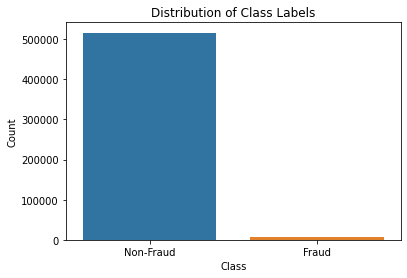

Percentage of Non-Fraudulent Cases: 98.46%
Percentage of Fraudulent Cases: 1.54%


In [55]:
fraud_counts = y_train.value_counts()
sns.countplot(x=y_train)
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

non_fraud_pct = 100 * fraud_counts[0] / len(y_train)
fraud_pct = 100 * fraud_counts[1] / len(y_train)
print("Percentage of Non-Fraudulent Cases: {:.2f}%".format(non_fraud_pct))
print("Percentage of Fraudulent Cases: {:.2f}%".format(fraud_pct))


We see that 1.57% percent of of our transactions are Fraudulent Cases which means we have heavy inbalance data.

Resampling can help model performance in cases of imbalanced data sets. There are three methods:
    
    - Undersampling non-fraud transactions: Remove random draws from the non-fraud observations
    - Oversampling fraud transactions: Take random draws from the fraud cases and duplicate them
    - Synthetic minority Oversampling Technique (SMOTE): Uses characteristics of nearest neighbors of fraud cases 
    to create new synthetic fraud cases




Note that we are applying resampling methods to just training set because test data should be free of duplicates and synthetic data. So we use resampling methods only on the training set, not on the test set.

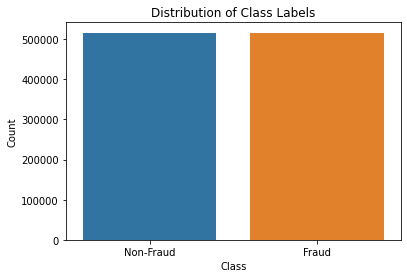

Percentage of Non-Fraudulent Cases: 50.00%
Percentage of Fraudulent Cases: 50.00%


In [56]:
# Apply SMOTE to balance classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot the class distribution after resampling
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

fraud_counts = y_train_resampled.value_counts()
non_fraud_pct = 100 * fraud_counts[0] / len(y_train_resampled)
fraud_pct = 100 * fraud_counts[1] / len(y_train_resampled)
print("Percentage of Non-Fraudulent Cases: {:.2f}%".format(non_fraud_pct))
print("Percentage of Fraudulent Cases: {:.2f}%".format(fraud_pct))


# Model selection and evaluation

In [57]:
X_train=X_train_resampled
y_train=y_train_resampled

Accuracy is not always the best metric for evaluating classification models in imbalanced datasets because it can be misleading. For instance, if we have 99% of non-fraudulent cases and only 1% of fraudulent cases, a model that always predicts non-fraudulent cases will have 99% accuracy, but it will completely miss the fraudulent cases. In this case, accuracy is not a good measure of the model's performance, and we need to use other metrics that take into account the true positive rate (recall) and the false positive rate (precision).

We will use ROC curve to compare the performance of different curves.

Alos, in the case of credit card fraud detection, recall is a more important evaluation metric than precision. We want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

## Comparison of different classification algorithms


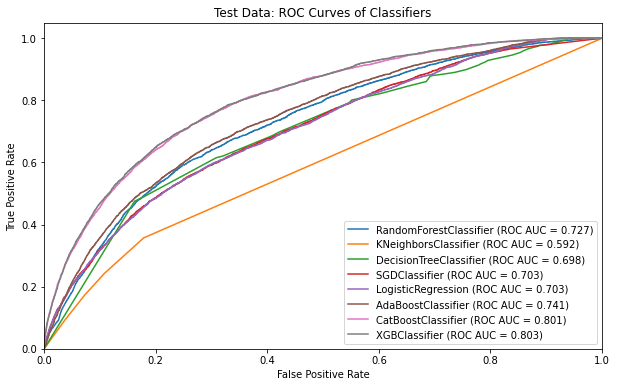

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
from joblib import dump, load

classifiers = [  
    RandomForestClassifier(max_depth = 6, random_state = 42),
    KNeighborsClassifier(),    
    DecisionTreeClassifier(max_depth=6, random_state=42), 
    SGDClassifier(loss='modified_huber', random_state=42),
    LogisticRegression(max_iter=1000, solver='liblinear', random_state=42), 
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, learning_rate=0.1, random_state=42),        
    CatBoostClassifier(verbose=0, random_state=42, depth=6, learning_rate=0.1, l2_leaf_reg=3, colsample_bylevel=0.7, bagging_temperature=0.8),        
    XGBClassifier(eval_metric='logloss', random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=6, reg_alpha=0.1, reg_lambda=0.1)]

# Logging for Visual Comparison
log_cols=["Classifier", "ROC AUC Score","Recall"]
log1 = pd.DataFrame(columns=log_cols)
log2 = pd.DataFrame(columns=log_cols)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    train_predictions = clf.predict_proba(X_train)
    test_predictions = clf.predict_proba(X_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions[:,1])
    fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions[:,1])

    roc_auc_score_train = roc_auc_score(y_train, train_predictions[:,1])
    roc_auc_score_test = roc_auc_score(y_test, test_predictions[:,1])
        
    axs.plot(fpr_test, tpr_test, label=name + " (ROC AUC = {:.3f})".format(roc_auc_score_test))

    # Save the model after fitting
    dump(clf, f'{name}.joblib')
    
    log_entry2 = pd.DataFrame([[name, roc_auc_score_test, tpr_test[1]]], columns=log_cols)
    log2 = pd.concat([log2, log_entry2], axis=0)
    

axs.set_xlabel("False Positive Rate")
axs.set_ylabel("True Positive Rate")
axs.set_ylim([0.0, 1.05])
axs.set_xlim([0.0, 1.0])
axs.set_title("Test Data: ROC Curves of Classifiers")
axs.legend(loc="lower right")

plt.show()


One solution could be Random Forest. As we can see below, the model is suffering from overfitting. In the next step, we will work on hyperparameter tuning to address this issue.

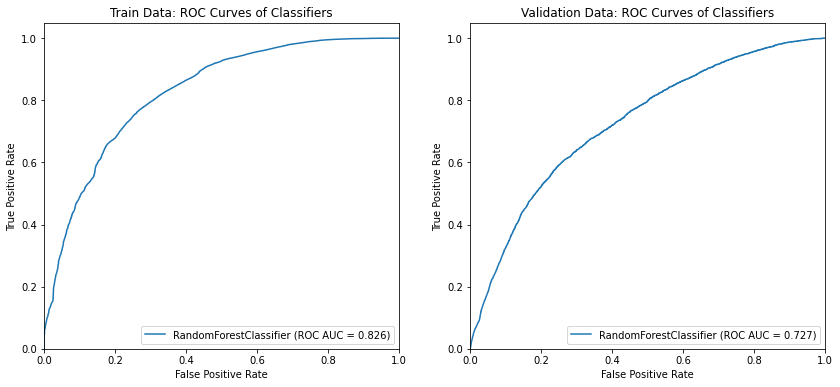

In [64]:
# Load the model from disk later
rf= load('RandomForestClassifier.joblib')

# Logging for Visual Comparison
log_cols=["Classifier", "ROC AUC Score","Recall"]
log1 = pd.DataFrame(columns=log_cols)
log2 = pd.DataFrame(columns=log_cols)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

name = rf.__class__.__name__
train_predictions = rf.predict_proba(X_train)
test_predictions = rf.predict_proba(X_test)
    
fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions[:,1])
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions[:,1])

roc_auc_score_train = roc_auc_score(y_train, train_predictions[:,1])
roc_auc_score_test = roc_auc_score(y_test, test_predictions[:,1])
        
axs[0].plot(fpr_train, tpr_train, label=name + " (ROC AUC = {:.3f})".format(roc_auc_score_train))
axs[1].plot(fpr_test, tpr_test, label=name + " (ROC AUC = {:.3f})".format(roc_auc_score_test))

log_entry1 = pd.DataFrame([[name, roc_auc_score_train, tpr_train[1]]], columns=log_cols)
log1 = pd.concat([log1, log_entry1], axis=0)
    
log_entry2 = pd.DataFrame([[name, roc_auc_score_test, tpr_test[1]]], columns=log_cols)
log2 = pd.concat([log2, log_entry2], axis=0)
    
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlim([0.0, 1.0])
axs[0].set_title("Train Data: ROC Curves of Classifiers")
axs[0].legend(loc="lower right")

axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlim([0.0, 1.0])
axs[1].set_title("Validation Data: ROC Curves of Classifiers")
axs[1].legend(loc="lower right")

plt.show()

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning

param_grid = {
'n_estimators': [100, 200, 500],
'max_features': ['sqrt', 'log2'],
'max_depth': [5, 10, 15],
'min_samples_split': [2, 5, 8],
'min_samples_leaf': [1, 3, 5],
'bootstrap': [True, False]
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with 5-fold cross validation
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
rfc_random.fit(X_train, y_train)

# Print the best parameters and best score from the RandomizedSearchCV object
print("Best Parameters: ", rfc_random.best_params_)
print("Best Score: ", rfc_random.best_score_)

# Save the model to disk
dump(rfc_random, 'rfc_random.joblib')

# Load the model from disk later
#rfc_random = load('rfc_random.joblib')

## Most Important Feature Based on Random Forest

In [91]:
rf = load('RandomForestClassifier.joblib')

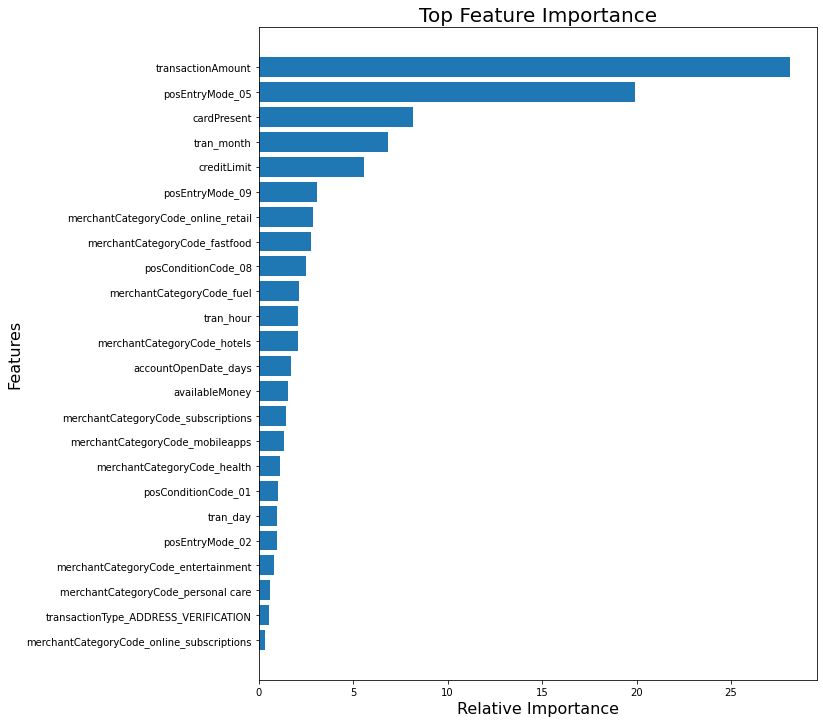

In [105]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
importances = rf.feature_importances_

feature_importance = 100.0 * (importances / importances.sum()) # relative importance
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5


# plot n top features
n=25
plt.figure(figsize=(10, 12))
plt.barh(pos[n:], feature_importance[sorted_idx[n:]], align='center')
plt.yticks(pos[n:], feature_names_sort[n:])
plt.title('Top Feature Importance', fontsize=20)
plt.xlabel('Relative Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.show()

In [106]:
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

Top 10 features are: 
transactionAmount
posEntryMode_05
cardPresent
tran_month
creditLimit
posEntryMode_09
merchantCategoryCode_online_retail
merchantCategoryCode_fastfood
posConditionCode_08
merchantCategoryCode_fuel


Some features are more important than others to identify fraud transactions. Here we found the 10 most important features that can identify fraud transactions based on Random Forest ML model.

    - Transaction Amount
    - PosEntryMode = 05 or 09
    - Card Present
    - Credit Limit
    - Merchant Category Code = 'Fuel' or 'Online Retail' or 'Fastfood
    - The month that transaction happen


## Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Load the models
rf = load('RandomForestClassifier.joblib')
ada = load('AdaBoostClassifier.joblib')
cat = load('CatBoostClassifier.joblib')
xgb = load('XGBClassifier.joblib')

# Define the list of models
models = [rf, ada, cat, xgb]

# Loop through each model
for model in models:
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute evaluation metrics
    print('='*50)
    print(model.__class__.__name__)
    print('='*50)
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('ROC AUC score:', roc_auc_score(y_test, y_prob))
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    print('PR AUC score:', auc(recall, precision))
    print('Other metrics:')
    # Add any other desired metrics here
    print('Accuracy:', np.mean(y_pred == y_test))
    print('F1-score:', 2 * precision[1] * recall[1] / (precision[1] + recall[1]))


Please note that the test data is not resampled so it is heavy imbalanced.

# Future Works

Some other ideas for future versions:

- Experiment with different scaling, encoding, and transformation techniques on our dataset, such as log-transformation, Box-Cox transformation, label encoding, and frequency encoding. This could potentially improve the outcome of our model.

- Adding other sampling methods like Oversampling or Undersampling to see which technique works better for our specific dataset.

- Using dimensionality reduction techniques such as PCA to further improve the performance of the model.

- Run Hyperparameter tuning for Random Forest (and other models) to find the best combination of hyperparameters. Due to time constraints, I was not able to perform Hyperparameter tuning, but it could be a valuable step in improving the accuracy of our model.

# Summary


1.Our original dataset: 786,363 instances and each one of them has 29 features
    
2.Feature Engineering:

- Remove Rows:
    - We remove duplicates rows including reversal transactionType and multi-swipe transactions.
    - Since less than 0.6% of rows have null values, we removed those rows from dataset.
    
    
- Remove Columns: 
    - All values are Nulls: 'echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'
    - Not Useful: 'accountNumber','customerId','cardLast4Digits','currentBalance' (currentBalance=creditLimit-availableMone and we already have both columns in dataset)
    
    
- New Features: 
    - CVV_correct: to see if a customer enters right CVV code (based on 'cardCVV' and 'enteredCVV')
    - accountOpenDate_days: Number of days since its opening (based on 'accountOpenDate')
    - dateOfLastAddressChange_days: Number of days since last address changing (based on 'dateOfLastAddressChange')
    - currentExpDate_days: Number of days until expiration date (based on 'currentExpDate')
    - tran_month: The Month of the datetime in transactions (based on 'transactionDateTime')
    - tran_day: The day of the datetime in transactions (based on 'transactionDateTime')
    - tran_hour: The hours of the datetime in transactions (based on 'transactionDateTime')
    
    
- Convert Bool features to int: 
    - cardPresent','expirationDateKeyInMatch','isFraud','CVV_correct'
    
    
- Categoical Columns:
    - Use One-hot Encoding: 'acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode'
    
    
- Numerical Columns:
    - Use StandardScaler: 'creditLimit','availableMoney','transactionAmount','accountOpenDate_days','dateOfLastAddressChange_days',
         'currentExpDate_days','tran_day','tran_hour'
         
         
3.Split data to train and test


4.Use Smote sampling technique on Training set in order to balance the data 


5.Use different ML models for training: Logistic Regression, Random Forest Classifier, Gradient Boosting, Stochastic Gradient Descent, and Ada Boost Classifier


6.Compare different models based on ROC curve


7.Hyperparameter tuning for Random Forest


8.Ten most important features that can identify fraudulent transactions based on Random Forest Classifier:

   - Transaction Amount
   - PosEntryMode = 05
   - Card Present
   - Credit Limit
   - Pos Entry Mode = 09
   - Merchant Category Code = 'Fuel' or 'Online Retail' or 'Fastfood' or 'Hotels'
   - The Hour that transaction happen (tran_hour)
   
   
